In [1]:
import pandas as pd
df = pd.read_csv('Data/school.csv')
df.head(3)

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   teaching                2603 non-null   float64
 1   international           2603 non-null   float64
 2   research                2603 non-null   float64
 3   citations               2603 non-null   float64
 4   income                  2603 non-null   float64
 5   num_students            2603 non-null   int64  
 6   student_staff_ratio     2603 non-null   float64
 7   international_students  2603 non-null   float64
 8   total_score             2603 non-null   float64
 9   Label                   2603 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 203.5 KB


In [3]:
df.Label.value_counts()

Label
0    2158
1     445
Name: count, dtype: int64

In [4]:
df.describe()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,37.801498,52.007415,35.910257,60.921629,48.897810,23332.632347,18.027199,0.150465,59.821283,0.170957
std,17.604218,22.065565,21.254805,23.073219,20.275104,17832.143362,11.656084,0.107366,8.694916,0.376543
min,9.900000,7.100000,2.900000,1.200000,24.200000,0.000000,0.000000,0.000000,41.400000,0.000000
25%,24.700000,33.500000,19.600000,45.500000,33.600000,12199.500000,11.650000,0.070000,57.100000,0.000000
50%,33.900000,50.400000,30.500000,62.500000,42.600000,20584.000000,15.900000,0.130000,59.800000,0.000000
75%,46.400000,69.000000,47.250000,79.050000,56.000000,29787.000000,21.200000,0.210000,59.800000,0.000000
max,99.700000,100.000000,99.400000,100.000000,100.000000,379231.000000,162.600000,0.820000,96.100000,1.000000


In [5]:
# 한글처리 폰트설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

<Axes: xlabel='count', ylabel='Label'>

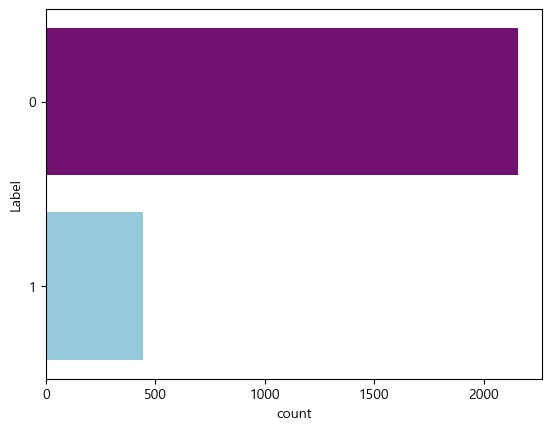

In [6]:
import seaborn as sns
sns.countplot(y = 'Label', data = df, palette = ['purple','skyblue'])

In [7]:
cols = df.columns[:8]
x = df[cols]
y = df.Label

In [8]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(x,y)
y_sample = pd.DataFrame(data=y_sample, columns = ['Label'])
df_sample = pd.concat([x_sample, y_sample], axis = 1)
df_sample.Label.value_counts()

Label
0    445
1    445
Name: count, dtype: int64

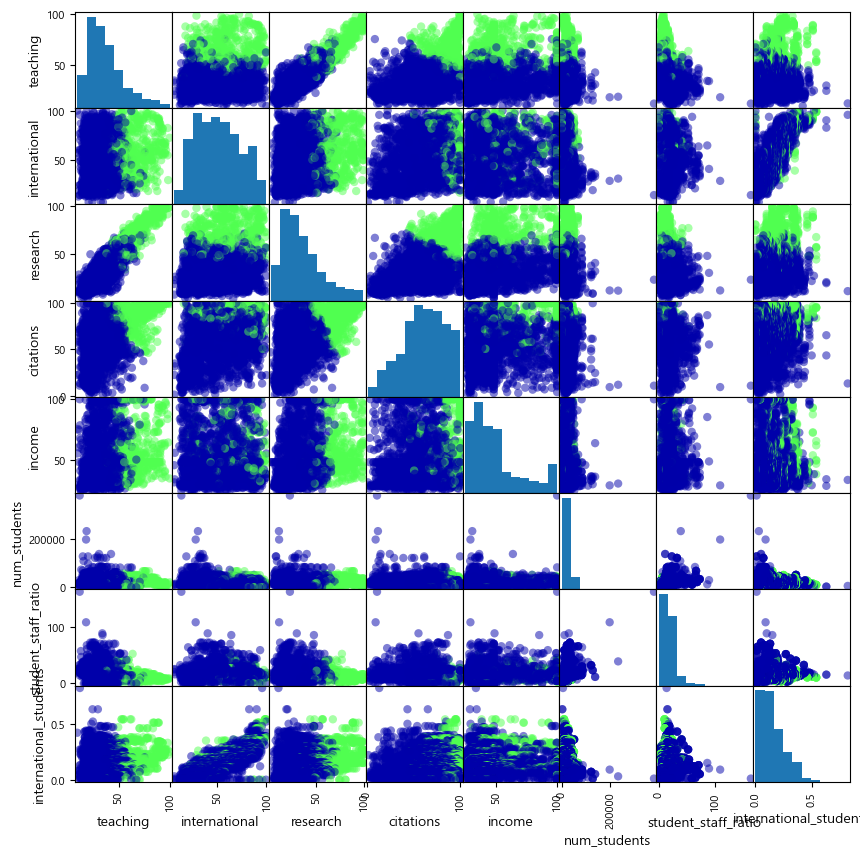

In [9]:
# 산점도행렬
import matplotlib.pyplot as plt
import mglearn
# pd.plotting.scatter_matrix(x, figsize = (10, 10), marker='o', cmap = mglearn.cm3)
pd.plotting.scatter_matrix(x, c=y, figsize = (10, 10), marker='o', cmap = mglearn.cm3)
plt.show()

In [10]:
# 데이터 Split
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x_sample, y_sample, test_size=0.2, stratify = y_sample, random_state=10)

In [19]:
# 모델링

from keras import Sequential
from keras.layers import Dense

class MyModel(Sequential):
    def __init__(self, input_nodes, hidden_layers, num_classes):
        super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.add(Dense(hidden_layers[0], input_shape = (input_nodes,), activation = 'relu', name = 'input'))
        self.add(Dense(hidden_layers[1], activation='relu', name='hidden-1'))
        self.add(Dense(hidden_layers[2], activation='relu', name='hidden-2'))
        self.add(Dense(num_classes, activation='sigmoid', name= 'output'))

model = MyModel(len(x_tr.columns), [128, 64, 32], 1)

In [20]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1152      
                                                                 
 hidden-1 (Dense)            (None, 64)                8256      
                                                                 
 hidden-2 (Dense)            (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


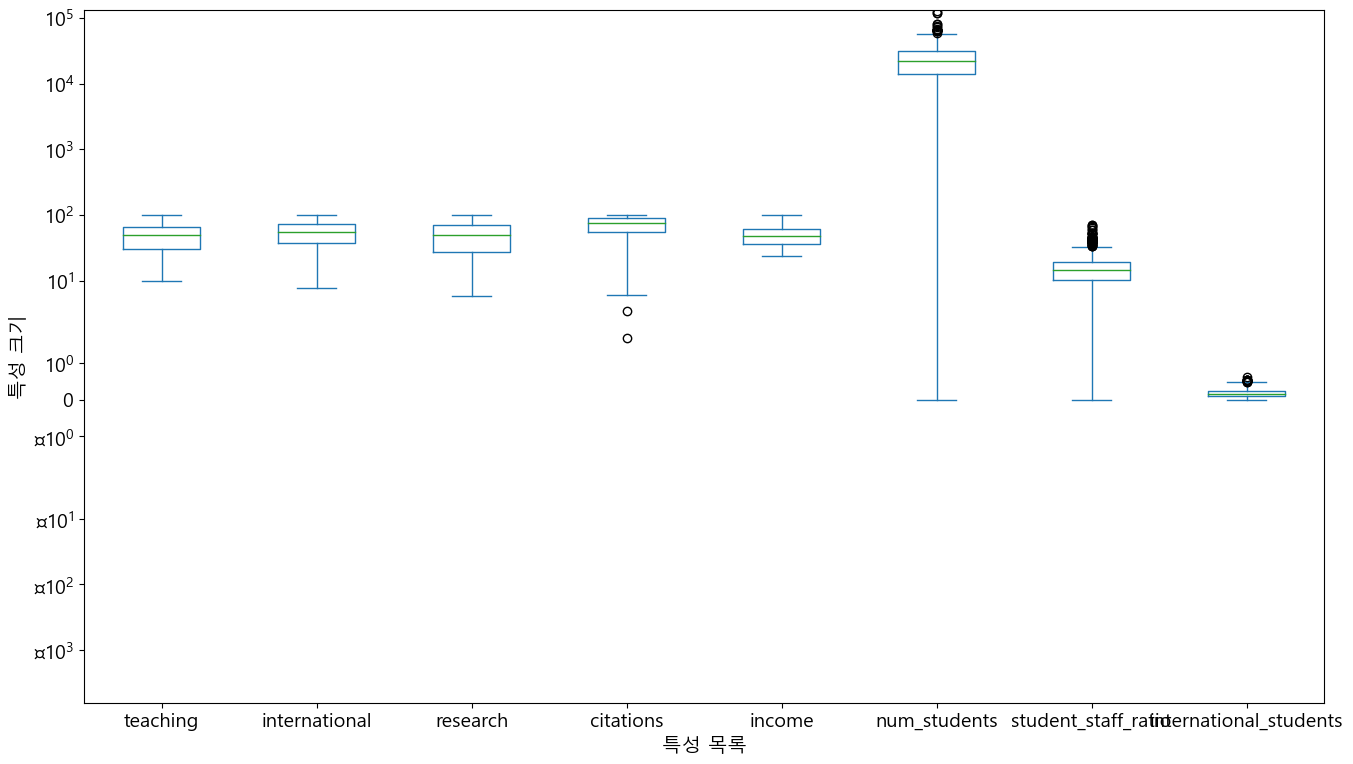

In [15]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 14
df_sample[cols].plot.box()
plt.yscale('symlog')
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

In [16]:
# min-max scaling
min_on_tr = x_tr.min(axis = 0)
range_on_tr = (x_tr - min_on_tr).max(axis = 0)

x_tr_scaled = (x_tr - min_on_tr) / range_on_tr
x_ts_scaled = (x_ts - min_on_tr) / range_on_tr
print("특성별 최소값\n{0}".format(x_tr_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(x_tr_scaled.max(axis=0)))

특성별 최소값
teaching                  0.0
international             0.0
research                  0.0
citations                 0.0
income                    0.0
num_students              0.0
student_staff_ratio       0.0
international_students    0.0
dtype: float64
특성별 최대값
teaching                  1.0
international             1.0
research                  1.0
citations                 1.0
income                    1.0
num_students              1.0
student_staff_ratio       1.0
international_students    1.0
dtype: float64


In [22]:
# 조기학습 종료
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', patience = 5)
    # monitor: 평가기준 patience: 임계치
mc = ModelCheckpoint('Data/result/school/best_model.h5', monitor = 'val_loss', save_best_only = True)
    # best모델저장

# 모델학습
hist = model.fit(x_tr_scaled, y_tr, epochs= 50, validation_split = 0.2, callbacks = [es, mc] )
    # 신경망 모델에서는 validation_split이 중요함

Epoch 1/50
18/18 [==============================] - 1s 17ms/step - loss: 0.2289 - accuracy: 0.7996 - val_loss: 0.1966 - val_accuracy: 0.8601
Epoch 2/50
18/18 [==============================] - 0s 14ms/step - loss: 0.1679 - accuracy: 0.8717 - val_loss: 0.1233 - val_accuracy: 0.9301
Epoch 3/50
18/18 [==============================] - 0s 12ms/step - loss: 0.1054 - accuracy: 0.9033 - val_loss: 0.0693 - val_accuracy: 0.9231
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0733 - accuracy: 0.9104 - val_loss: 0.0546 - val_accuracy: 0.9441
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0636 - accuracy: 0.9209 - val_loss: 0.0658 - val_accuracy: 0.9161
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0677 - accuracy: 0.8946 - val_loss: 0.0371 - val_accuracy: 0.9580
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0513 - accuracy: 0.9262 - val_loss: 0.0295 - val_accuracy: 0.9720
Epoch 8/50
18/18 

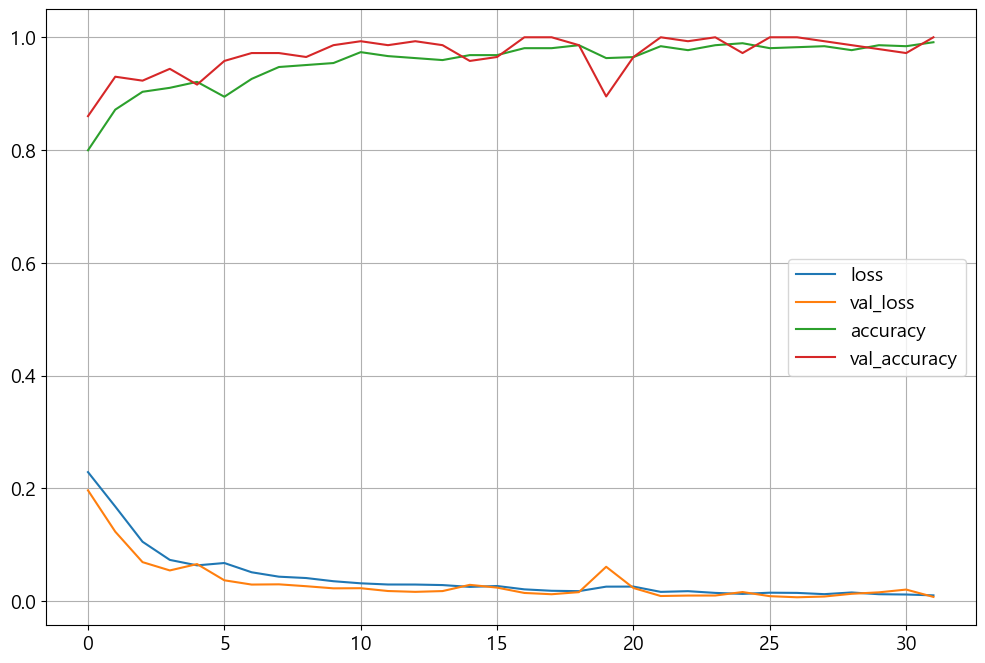

In [23]:
# 모델 학습과정 표시
plt.figure(figsize = (12,8))
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()

In [24]:
# 모델평가
scores_tr = model.evaluate(x_tr_scaled, y_tr, verbose = 1)
print(scores_tr)
print('%s: %.2f%%' %(model.metrics_names[1], scores_tr[1]*100))   # 학습용

scores_ts = model.evaluate(x_ts_scaled, y_ts, verbose = 1)
print(scores_ts)
print('%s: %.2f%%' %(model.metrics_names[1], scores_ts[1]*100))   # 검증용

23/23 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9930
[0.00922592356801033, 0.992977499961853]
accuracy: 99.30%
6/6 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9831
[0.008941455744206905, 0.983146071434021]
accuracy: 98.31%


In [25]:
scores_tr

[0.00922592356801033, 0.992977499961853]

In [26]:
scores_ts

[0.008941455744206905, 0.983146071434021]

In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
df.head(3)

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0


In [34]:
df_rg = df.iloc[:,:-1]
df_rg.describe()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,37.801498,52.007415,35.910257,60.921629,48.897810,23332.632347,18.027199,0.150465,59.821283
std,17.604218,22.065565,21.254805,23.073219,20.275104,17832.143362,11.656084,0.107366,8.694916
min,9.900000,7.100000,2.900000,1.200000,24.200000,0.000000,0.000000,0.000000,41.400000
25%,24.700000,33.500000,19.600000,45.500000,33.600000,12199.500000,11.650000,0.070000,57.100000
50%,33.900000,50.400000,30.500000,62.500000,42.600000,20584.000000,15.900000,0.130000,59.800000
75%,46.400000,69.000000,47.250000,79.050000,56.000000,29787.000000,21.200000,0.210000,59.800000
max,99.700000,100.000000,99.400000,100.000000,100.000000,379231.000000,162.600000,0.820000,96.100000


In [35]:
xx = df_rg.iloc[:,:-1]
yy = df_rg['total_score']

In [36]:
from sklearn.model_selection import train_test_split
xx_tr, xx_ts, yy_tr, yy_ts = train_test_split(xx, yy, test_size=0.2)

In [37]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(xx_tr)
xx_tr_scaled = mm.transform(xx_tr)
xx_ts_scaled = mm.transform(xx_ts)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xx_tr_scaled, yy_tr)

LinearRegression()

In [42]:
yy_tr

2049    59.8
895     76.5
2307    59.8
852     59.8
1128    59.8
        ... 
350     92.7
168     41.5
58      59.8
1466    59.8
1837    59.8
Name: total_score, Length: 2082, dtype: float64

In [41]:
print('학습용:' , lr.score(xx_tr, yy_tr))
print('검증용:', lr.score(xx_ts, yy_ts))

학습용: -460909773.878384
검증용: -397773838.42866236


c:\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
